In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import pandas as pd
print("TensorFlow Version:", tf.__version__)
print("Keras Version:", keras.__version__)

2025-05-28 22:07:54.983395: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorFlow Version: 2.18.1
Keras Version: 3.6.0


In [2]:
mnist = keras.datasets.fashion_mnist.load_data()

In [3]:
 (x_train, y_train), (x_test, y_test) = mnist

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

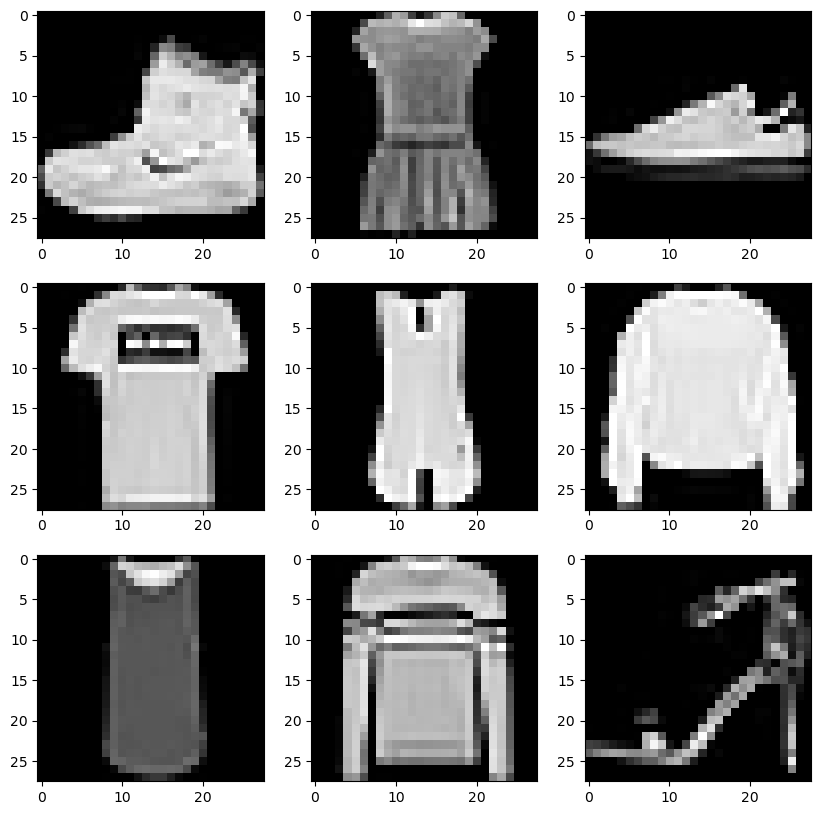

In [7]:
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(10,10))
a = 0

for i in range(3):
    for j in range(3):
        axes[j,i].imshow(x_train[a], cmap=plt.get_cmap('gray'))
        a +=1
plt.show()

In [8]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [10]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [12]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [13]:
class_names[y_train[0]]

'9'

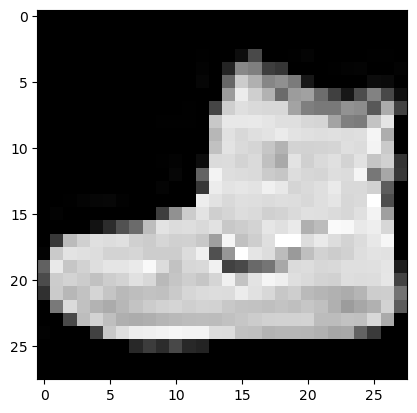

In [14]:
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

#Sigmoid: probabilities produced by a Sigmoid are independent.
#Softmax: the outputs are interrelated. The sum of all outputs are 1.

/home/vel/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [18]:
# https://keras.io/api/losses/
# https://keras.io/api/optimizers/#available-optimizers
# https://keras.io/api/metrics/

model.compile(loss='SparseCategoricalCrossentropy', optimizer='sgd', metrics=['accuracy'])

In [20]:
# batch = The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters.
# epochs = how many times to do a pass over all the dataset

# https://keras.io/api/models/model_training_apis/#fit-method
history = model.fit(x_train, y_train, epochs=30, validation_data = (x_train, y_train), batch_size=32) # also possible to use validation_split=0.1

Epoch 1/30


2025-05-28 22:09:16.828632: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6943 - loss: 0.9627

2025-05-28 22:09:21.537896: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6944 - loss: 0.9623 - val_accuracy: 0.8120 - val_loss: 0.5274
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8261 - loss: 0.4986 - val_accuracy: 0.8443 - val_loss: 0.4487
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8450 - loss: 0.4441 - val_accuracy: 0.8581 - val_loss: 0.4068
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8554 - loss: 0.4155 - val_accuracy: 0.8631 - val_loss: 0.3952
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8638 - loss: 0.3896 - val_accuracy: 0.8673 - val_loss: 0.3763
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8688 - loss: 0.3744 - val_accuracy: 0.8766 - val_loss: 0.3531
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8702 - loss: 0.3669 - val_accuracy: 0.8747 - val_loss: 0.3529
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8731 - loss: 0.3548 - val_accurac

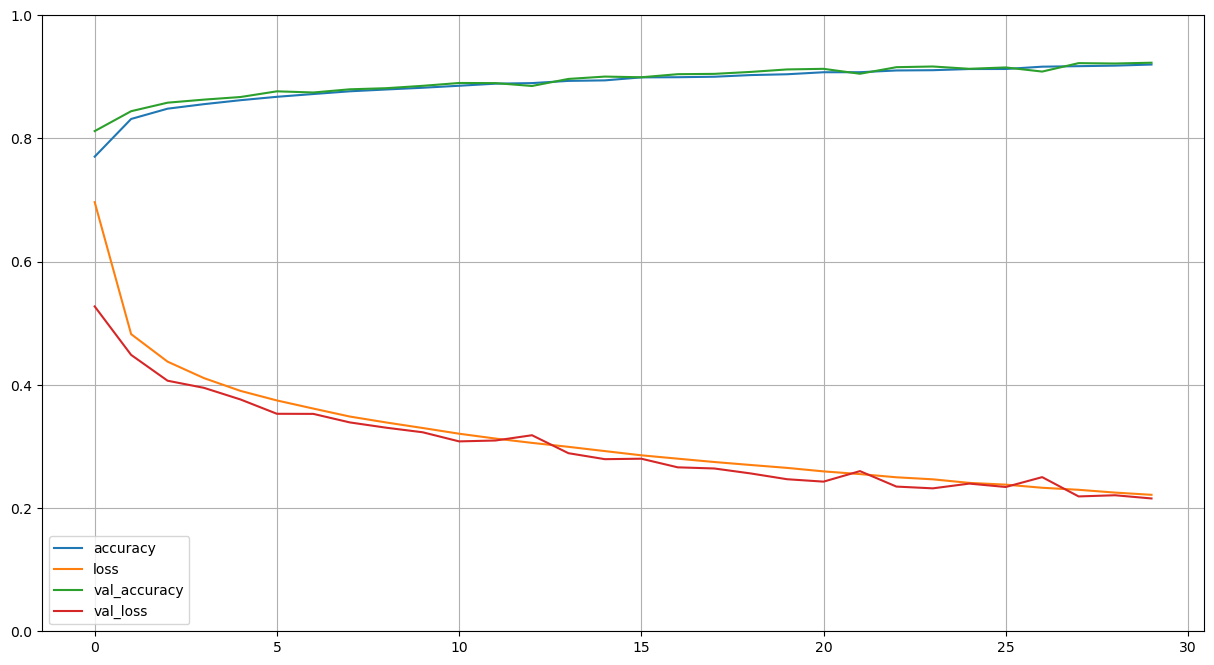

In [21]:
pd.DataFrame(history.history).plot(figsize=(15,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [22]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8850 - loss: 0.3302


[0.3273830711841583, 0.8858000040054321]

In [24]:
model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


array([[1.87102432e-06, 1.64609764e-06, 1.89308992e-06, ...,
        1.61378849e-02, 1.06317981e-04, 9.51514423e-01],
       [2.47196003e-04, 1.21856445e-07, 9.80749249e-01, ...,
        3.15449666e-09, 4.01883575e-08, 2.18792727e-11],
       [1.58836065e-05, 9.99979258e-01, 2.30085121e-07, ...,
        5.30226529e-09, 3.84520149e-09, 1.15750994e-11],
       ...,
       [5.58204297e-03, 1.91166158e-08, 5.37958287e-04, ...,
        4.14273791e-06, 9.92945850e-01, 1.38415601e-09],
       [1.51425149e-06, 9.99889970e-01, 1.07505912e-06, ...,
        2.80470802e-09, 4.57413911e-08, 4.25934807e-08],
       [2.31008016e-05, 1.11700510e-05, 1.84660632e-04, ...,
        1.00673605e-02, 3.79715813e-04, 1.92746775e-05]], dtype=float32)

In [25]:
y_prob = model.predict(x_test)
y_classes = y_prob.argmax(axis=-1)
y_classes

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 


array([9, 2, 1, ..., 8, 1, 5])

In [26]:
confusion_matrix = tf.math.confusion_matrix(y_test, y_classes)

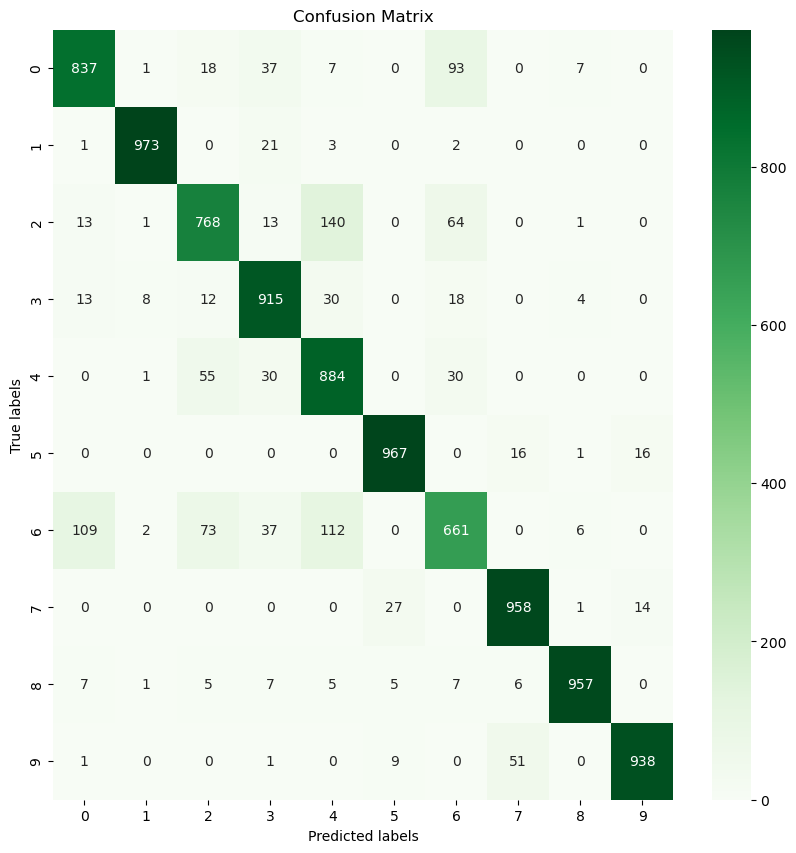

In [27]:
import seaborn as sb    

# ax = plt.figure(figsize=(8, 6))
fig = sb.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Greens')  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
fig.set_xlabel('Predicted labels')
fig.set_ylabel('True labels')
fig.set_title('Confusion Matrix')
fig.xaxis.set_ticklabels(class_names) 
fig.yaxis.set_ticklabels(class_names)
fig.figure.set_size_inches(10, 10)


plt.show()